In [1]:
import pyodbc
from bokeh.plotting import figure
from bokeh.embed import components
import pandas as pd
import random
from bokeh.models import (HoverTool, FactorRange, Plot, LinearAxis, Grid,
                          Range1d)
from bokeh.models.glyphs import VBar
from bokeh.plotting import figure,show
from bokeh.io import show, output_notebook



from bokeh.embed import components
from bokeh.models.sources import ColumnDataSource

output_notebook()

server = '(localdb)\MSSQLLocalDB'
database = 'SCMdb'
username = 'Guest'
password = 'Guest'
driver= '{ODBC Driver 17 for SQL Server}'
con = pyodbc.connect("Driver="+driver+";Server="+server+";Database="+database+";Uid="+username+";Pwd="+password+";TrustServerCertificate=no;Connection Timeout=30;")
SQL_Query = pd.read_sql_query("set nocount on exec [prc_getsalesbymonth]", con)
df = pd.DataFrame(SQL_Query)
feature_names = df.columns[0:-1].values.tolist()
df.head()


Loading BokehJS ...

,product_id,jan,feb,mar,apr,may,jun,jul,aug,sep,oct,nov,dec,unit_cost,lead_time,retail_price,quantity_on_hand
0,pr1,485,487,561,677,773,850,873,794,736,660,668,533,9.0,10,10.0,-30518
1,pr2,1733,1801,2473,2692,2872,3201,3362,2894,2713,2551,2634,1986,6.0,10,10.0,2165


In [2]:
df.columns[1:13].values

array(['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep',
       'oct', 'nov', 'dec'], dtype=object)

In [3]:
df.iloc[1,1:13].values

array([1733, 1801, 2473, 2692, 2872, 3201, 3362, 2894, 2713, 2551, 2634,
       1986], dtype=object)

In [4]:
teams = df.columns[1:13].values
# Activity: We experimented with the Hover Tool and the
# Box Select tool in the previous example, try to
# include those tools in this graph
# Number of world cups that the team has won
wc_won = df.iloc[1,1:13].values
# Setting toolbar_location=None and tools="" essentially
# hides the toolbar from the graph
barchart = figure(x_range=teams, plot_height=250, title="WC Counts",
         toolbar_location=None, tools="")
barchart.vbar(x=teams, top=wc_won, width=0.5)
# Acitivity: Play with the width variable and see what
# happens. In particular, try to set a value above 1 for
# it 
barchart.xgrid.grid_line_color = 'red'
barchart.y_range.start = 0
show(barchart)


In [5]:
X= 
# Activity: We experimented with the Hover Tool and the
# Box Select tool in the previous example, try to
# include those tools in this graph
# Number of world cups that the team has won
y = df.iloc[1,1:13].values
# Setting toolbar_location=None and tools="" essentially
# hides the toolbar from the graph
barchart = figure(x_range=X, plot_height=250, title="WC Counts",
         toolbar_location=None, tools="")
barchart.vbar(x=X, top=y, width=0.5)
# Acitivity: Play with the width variable and see what
# happens. In particular, try to set a value above 1 for
# it 
barchart.xgrid.grid_line_color = 'red'
barchart.y_range.start = 0
show(barchart)


SyntaxError: invalid syntax (<ipython-input-5-271946e9f513>, line 1)

In [ ]:
from bokeh.models import FactorRange

prs= ['pr1','pr2']
months=['Jan', 'Feb', 'Mar']

data = {'pr': pr,
        'Jan'   : df.iloc[0,1:4],
        'Feb'   : df.iloc[1,1:4]}

# this creates [ ("Apples", "2015"), ("Apples", "2016"), ("Apples", "2017"), ("Pears", "2015), ... ]

x = [ (pr, month) for pr in prs for month in months ]

counts = sum(zip(data['Jan'], data['Feb']), ()) # like an hstack

source = ColumnDataSource(data=dict(x=x, counts=counts))

p = figure(x_range=FactorRange(*x), plot_height=250, title="Sales By 3 Month")

p.vbar(x='x', top='counts', width=0.9, source=source)

p.y_range.start = 0
p.x_range.range_padding = 0.1
p.xaxis.major_label_orientation = 1
p.xgrid.grid_line_color = None

show(p)

In [7]:
p = figure(plot_width=400, plot_height=400,x_range=['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep',
       'oct', 'nov', 'dec'])
from bokeh.models import DatetimeTickFormatter
# add a line renderer

p.line(y=df.iloc[0,1:13].values,x=df.columns[1:13].values,line_width=2)
show(p)

In [11]:
df.iloc[0,1:13]

jan    485
feb    487
mar    561
apr    677
may    773
jun    850
jul    873
aug    794
sep    736
oct    660
nov    668
dec    533
Name: 0, dtype: object

In [30]:
from pmdarima.arima import auto_arima
import matplotlib.pyplot as plt

model = auto_arima(df.iloc[0,1:8].values, trace=True,seasonal=True,
                     stepwise=True, error_action='ignore', suppress_warnings=True)
model.fit(df.iloc[0,1:8])

forecast = model.predict(n_periods=4)
forecast = pd.DataFrame(forecast,columns=['Prediction'])

Fit ARIMA: order=(1, 0, 1) seasonal_order=(0, 0, 0, 1); AIC=84.356, BIC=84.140, Fit time=0.197 seconds
Fit ARIMA: order=(0, 0, 0) seasonal_order=(0, 0, 0, 1); AIC=94.290, BIC=94.181, Fit time=0.007 seconds
Fit ARIMA: order=(1, 0, 0) seasonal_order=(0, 0, 0, 1); AIC=88.001, BIC=87.839, Fit time=0.059 seconds
Fit ARIMA: order=(0, 0, 1) seasonal_order=(0, 0, 0, 1); AIC=90.204, BIC=90.042, Fit time=0.048 seconds
Fit ARIMA: order=(2, 0, 1) seasonal_order=(0, 0, 0, 1); AIC=87.486, BIC=87.215, Fit time=0.228 seconds
Fit ARIMA: order=(1, 0, 2) seasonal_order=(0, 0, 0, 1); AIC=nan, BIC=nan, Fit time=0.014 seconds
Fit ARIMA: order=(2, 0, 2) seasonal_order=(0, 0, 0, 1); AIC=nan, BIC=nan, Fit time=0.014 seconds
Total fit time: 0.575 seconds


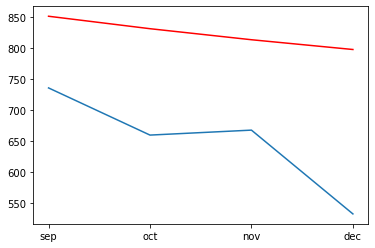

In [31]:
plt.plot(forecast,color='red')
plt.plot(df.iloc[0,9:13])

In [2]:
server = '(localdb)\MSSQLLocalDB'
database = 'SCMdb'
username = 'Guest'
password = 'Guest'
driver= '{ODBC Driver 17 for SQL Server}'
con = pyodbc.connect("Driver="+driver+";Server="+server+";Database="+database+";Uid="+username+";Pwd="+password+";TrustServerCertificate=no;Connection Timeout=30;")
SQL_Query = pd.read_sql_query("select * from show_sales where prod_id='pr1'", con)
df=pd.DataFrame(SQL_Query)

df.head()


,date,prod_id,Quantity
0,2016-04-24,pr1,26.0
1,2016-04-25,pr1,15.0
2,2016-04-26,pr1,20.0
3,2016-04-27,pr1,19.0
4,2016-04-28,pr1,21.0


In [3]:
df['date'] = pd.to_datetime(df['date'])
df=df.drop(['prod_id'], axis=1)
df=df.set_index('date')

In [4]:

y=df
y = df['Quantity'].resample('MS').sum()
train=y[0:-2]
valid=y[-12:]

In [5]:
valid.index

DatetimeIndex(['2018-01-01', '2018-02-01', '2018-03-01', '2018-04-01',
               '2018-05-01', '2018-06-01', '2018-07-01', '2018-08-01',
               '2018-09-01', '2018-10-01', '2018-11-01', '2018-12-01'],
              dtype='datetime64[ns]', name='date', freq='MS')

In [6]:
from pmdarima.arima import auto_arima
import matplotlib.pyplot as plt

model = auto_arima(y[:-1], trace=True, start_p=3, start_q=3, start_P=1, start_Q=5,
                     max_p=7, max_q=7, max_P=7, max_order=20,max_Q=6,D=1,d=1, m=1,seasonal=True,
                     stepwise=True, error_action='ignore', suppress_warnings=True)
model.fit(y[:-1])

forecast = model.predict(n_periods=4)


Fit ARIMA: order=(3, 1, 3) seasonal_order=(0, 0, 0, 1); AIC=798.481, BIC=815.876, Fit time=0.561 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 0, 0, 1); AIC=808.632, BIC=812.980, Fit time=0.008 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(0, 0, 0, 1); AIC=810.489, BIC=817.012, Fit time=0.106 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 0, 0, 1); AIC=810.517, BIC=817.040, Fit time=0.106 seconds
Fit ARIMA: order=(2, 1, 3) seasonal_order=(0, 0, 0, 1); AIC=797.258, BIC=812.479, Fit time=0.553 seconds
Fit ARIMA: order=(2, 1, 2) seasonal_order=(0, 0, 0, 1); AIC=803.288, BIC=816.334, Fit time=0.429 seconds
Fit ARIMA: order=(2, 1, 4) seasonal_order=(0, 0, 0, 1); AIC=799.030, BIC=816.425, Fit time=0.576 seconds
Fit ARIMA: order=(1, 1, 2) seasonal_order=(0, 0, 0, 1); AIC=801.515, BIC=812.387, Fit time=0.261 seconds
Fit ARIMA: order=(3, 1, 4) seasonal_order=(0, 0, 0, 1); AIC=796.283, BIC=815.852, Fit time=0.584 seconds
Fit ARIMA: order=(4, 1, 4) seasonal_order=(0, 0, 0, 1);

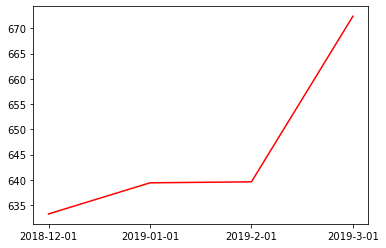

In [7]:
forecast = pd.DataFrame(forecast,index = ['2018-12-01','2019-01-01','2019-2-01','2019-3-01'],columns=['Prediction'])
plt.plot(forecast, label='Prediction',color='red')
plt.show()

In [8]:
forecast.index=pd.to_datetime(forecast.index)

C:\Users\magic\Anaconda3\envs\test\lib\site-packages\pandas\plotting\_matplotlib\converter.py:102: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


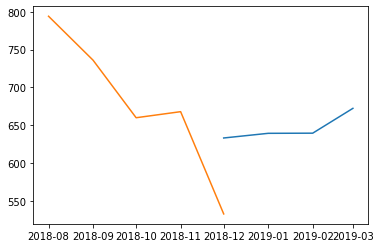

In [9]:
plt.plot(forecast)
plt.plot(y.tail())

In [10]:
X = ['January','February','March','April','May','June','July','August','September','October','November','December']
# Activity: We experimented with the Hover Tool and the
# Box Select tool in the previous example, try to
# include those tools in this graph
# Number of world cups that the team has won
Y = y.iloc[-12:].values
# Setting toolbar_location=None and tools="" essentially
# hides the toolbar from the graph
barchart = figure(x_range=X, plot_height=250, title="Current Sales",
         toolbar_location=None, tools="")
barchart.vbar(x=X, top=Y, width=0.5)
# Acitivity: Play with the width variable and see what
# happens. In particular, try to set a value above 1 for
# it 
barchart.xgrid.grid_line_color = 'red'
barchart.y_range.start = 0
show(barchart)

In [69]:
import numpy as np
from bokeh.models import HoverTool
hover1 = HoverTool(tooltips=[("Sales", "@y")])
X = ['December','January','February','March']

Y = y.iloc[-1:].values
Y= np.concatenate((Y, forecast['Prediction'].iloc[-3:].values))

p = figure(x_range=X, plot_height=400,x_axis_label='Month',x_minor_ticks=1,
           title="Forecast Sales",toolbar_location=None, tools=[hover1])
#barchart.vbar(x=X, top=Y, width=0.2)
p.line(y=Y,x=X,line_width=2)

p.y_range.start =0


show(p)

In [55]:
Y

array([533.        , 639.41468129, 639.60935244, 672.39576777])

In [13]:
print(p.x_range.start)

None
